In [52]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from dtreeviz.trees import dtreeviz 
import dtreeviz
import graphviz.backend as be
from IPython.display import Image,display_svg,SVG

In [9]:
df=pd.read_excel("modified.xlsx")

In [10]:
df.columns

Index(['CODE', 'COUNTRY', 'DATE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'GDP'], dtype='object')

In [11]:
features = ['HDI', 'TC', 'TD', 'STI', 'POP', 'GDP']


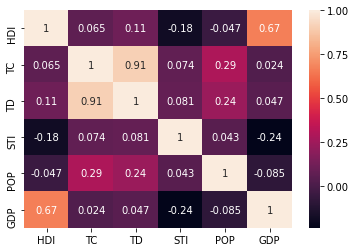

In [12]:
corrMatrix=df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

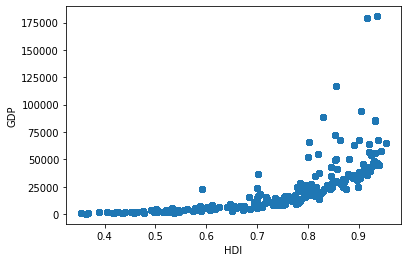

In [40]:
a=df.iloc[:,3]
plt.scatter(a,y)
plt.ylabel('GDP')
plt.xlabel('HDI')
plt.show()

In [57]:
df.dtypes

CODE        object
COUNTRY     object
DATE        object
HDI        float64
TC           int64
TD           int64
STI        float64
POP          int64
GDP        float64
dtype: object

In [15]:
#Finding missing values
df.isna().sum()

CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDP        0
dtype: int64

In [16]:
df.tail()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDP
50197,ZWE,Zimbabwe,15-10-2020,0.535,8055,231,76.85,14862927,1899.775
50198,ZWE,Zimbabwe,16-10-2020,0.535,8075,231,76.85,14862927,1899.775
50199,ZWE,Zimbabwe,17-10-2020,0.535,8099,231,76.85,14862927,1899.775
50200,ZWE,Zimbabwe,18-10-2020,0.535,8110,231,76.85,14862927,1899.775
50201,ZWE,Zimbabwe,19-10-2020,0.535,8147,231,76.85,14862927,1899.775


In [17]:
x=df.iloc[:,3:7]
y=df.iloc[:,8]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2,random_state=0)

In [19]:
from sklearn.ensemble import RandomForestRegressor
RFReg=RandomForestRegressor(n_estimators =100,random_state= 0)
RFReg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [20]:
x

,HDI,TC,TD,STI
0,0.498,0,0,0.00
1,0.498,0,0,0.00
2,0.498,0,0,0.00
3,0.498,0,0,0.00
4,0.498,0,0,0.00
...,...,...,...,...
50197,0.535,8055,231,76.85
50198,0.535,8075,231,76.85
50199,0.535,8099,231,76.85
50200,0.535,8110,231,76.85


In [21]:
y

0        1803.987
1        1803.987
2        1803.987
3        1803.987
4        1803.987
           ...   
50197    1899.775
50198    1899.775
50199    1899.775
50200    1899.775
50201    1899.775
Name: GDP, Length: 50202, dtype: float64

In [22]:
y_pred=RFReg.predict((x_test))


In [23]:
from sklearn import metrics
r=metrics.r2_score(y_test,y_pred)
print(r)

0.9854383453465997


In [24]:
RFReg.predict([[0.678,200,48,67]])

array([6785.59008])

In [25]:
import sklearn.metrics as met
rmse = met.mean_squared_error(y_test, y_pred)
mse = np.sqrt(rmse)
r2_score = met.r2_score(y_test, y_pred)
print("rmse:", rmse)
print("mse:", mse)
print("r2_score", r2_score)

rmse: 10016385.699688576
mse: 3164.8674063360972
r2_score 0.9854383453465997


In [26]:
imp=RFReg.feature_importances_

In [27]:
imp

array([0.7802066 , 0.11287111, 0.06659947, 0.04032282])

In [28]:
col=x_train.columns

In [29]:
rfgraph=pd.Series(imp,col)

In [30]:
rfgraph

HDI    0.780207
TC     0.112871
TD     0.066599
STI    0.040323
dtype: float64

In [31]:
from matplotlib.pyplot import figure

In [32]:
figure(figsize=(10,10))



<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

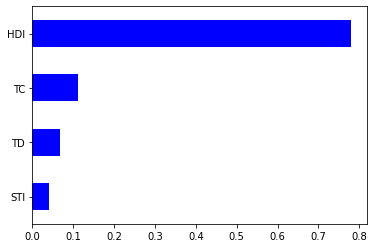

In [33]:
rfgraph.sort_values().plot.barh(color="blue")

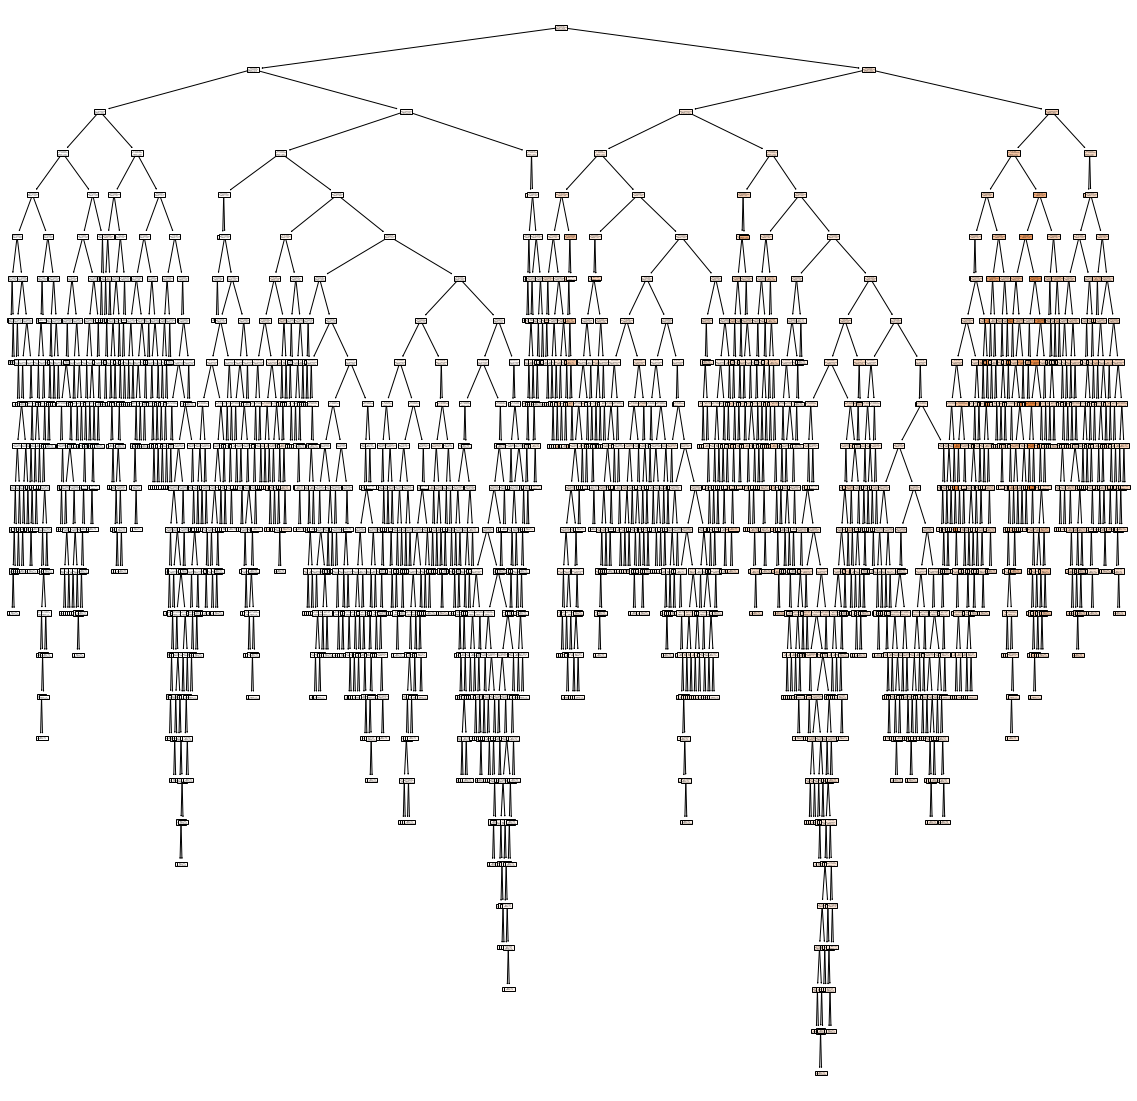

In [114]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(RFReg.estimators_[10],feature_names=col,filled=True)

In [34]:
RFReg.estimators_[0].tree_.max_depth

24

In [35]:
len(RFReg.estimators_)

100

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators =100,random_state= 0,max_depth=3)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

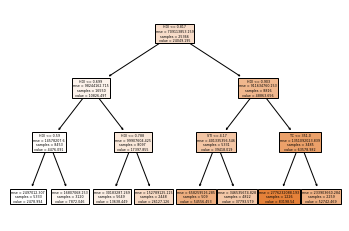

In [37]:
_ = tree.plot_tree(rf.estimators_[0], feature_names=col, filled=True)